In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
data.shape

(112, 2)

In [6]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [7]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [8]:
corr = data.corr(method="pearson")

<Axes: >

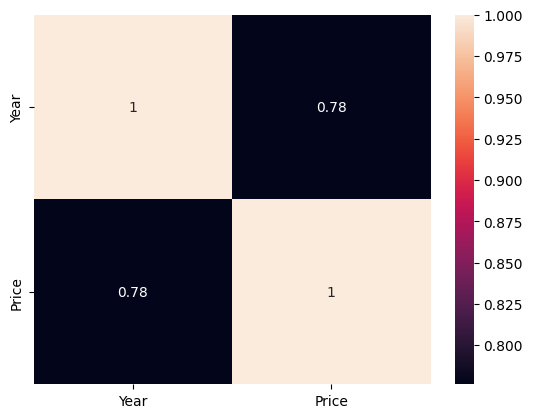

In [13]:
sns.heatmap(corr,annot=True)

In [9]:
y = data["Year"].values
X = data["Price"].values

In [10]:
X.shape

(112,)

In [11]:
y.shape

(112,)

In [12]:
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(112, 1)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Reshape X into a 2D array with one column
X = X.reshape(-1, 1)

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape , X_test.shape ,y_train.shape, y_test.shape)

(89, 1) (23, 1) (89, 1) (23, 1)


In [15]:
from sklearn.linear_model import LinearRegression
ln_model = LinearRegression()
ln_model.fit(X_train,y_train)
y_predictions = ln_model.predict(X_test)

In [28]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.1)

In [29]:
year_2022 = np.array([[2022]])
linear_pred_2022 = ln_model.predict(year_2022)
lasso_pred_2022 = lasso_reg.predict(year_2022)

In [30]:
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score
linear_rmse = np.sqrt(mean_squared_error(y_test,ln_model.predict(X_test)))
lasso_rmse = np.sqrt(mean_squared_error(y_test,lasso_reg.predict(X_test)))

In [31]:
print("\nModel Performance Comparison:")
print("Linear Regression RMSE:",linear_rmse)
print("Lasso Regression RMSE:",lasso_rmse)


Model Performance Comparison:
Linear Regression RMSE: 0.8224284346174506
Lasso Regression RMSE: 0.8407199876884762


<Axes: xlabel='Price', ylabel='Year'>

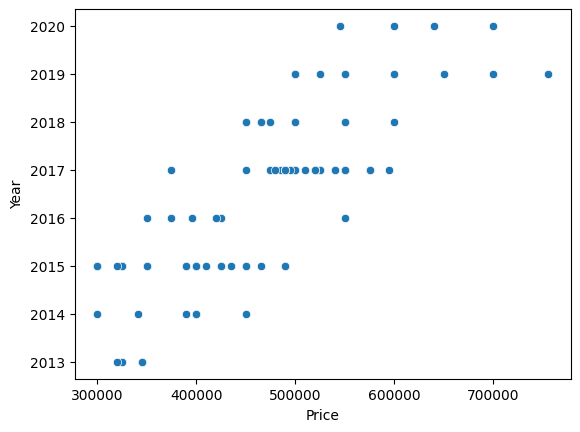

In [17]:
sns.scatterplot(x="Price",y="Year",data=data)

In [32]:
print("\nPredicted Price for 2022 model :")
print("Linear Regression:", linear_pred_2022[0])
print("Lasso Regression:", lasso_pred_2022[0])


Predicted Price for 2022 model :
Linear Regression: [1518.88471134]
Lasso Regression: 1325.1337973379887
